In [1]:
!pip install pandas matplotlib seaborn
!pip install scikit-learn
!pip install tslearn
!pip install numpy==2.2.0


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.1 MB/s eta 0:00:12
   -- ------------------------------------- 0.8/12.9 MB 1.1 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/12.9 MB 1.1 MB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.9 MB 1.2 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.9 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.9 MB 1.1 MB/s eta 0:00:10
   ------ --------------------------------- 2.1/12.9 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.9 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.9 MB 1.1 MB/s eta 0:00:10
   -------- --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.0 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.0 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df_train = pd.read_csv("Wine_TRAIN.csv", header=None)
df_test = pd.read_csv("Wine_TEST.csv", header=None)

# Объединим их для EDA
df = pd.concat([df_train, df_test], ignore_index=True)

# Разделим на метки и значения рядов
labels = df.iloc[:, 0]       # метки классов
time_series_values = df.iloc[:, 1:]   # временные ряды

C:\Users\Smart\AppData\Local\Temp\ipykernel_4956\1552411798.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


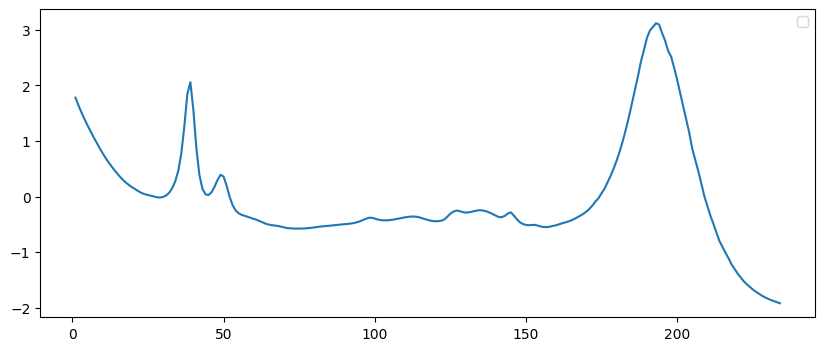

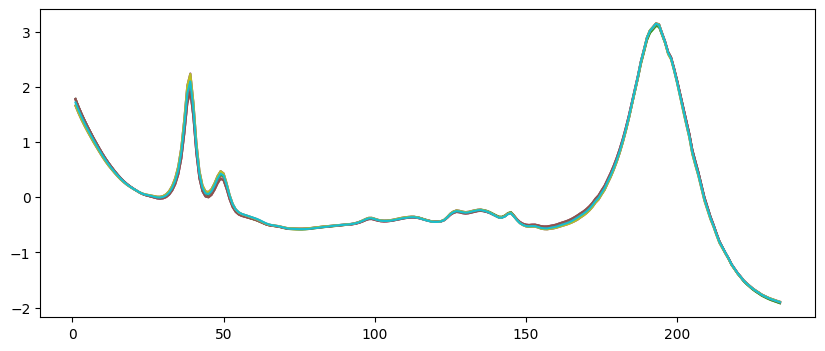

In [4]:
import matplotlib.pyplot as plt

# Пример временного ряда
plt.figure(figsize=(10,4))
plt.plot(time_series_values.iloc[0])
plt.legend()
plt.show()

# несколько рядов одного класса
plt.figure(figsize=(10,4))
for i in range(10):
    plt.plot(time_series_values.iloc[i])
plt.show()

(111, 235)
(57, 235) (54, 235)
0
1    57
2    54
Name: count, dtype: int64


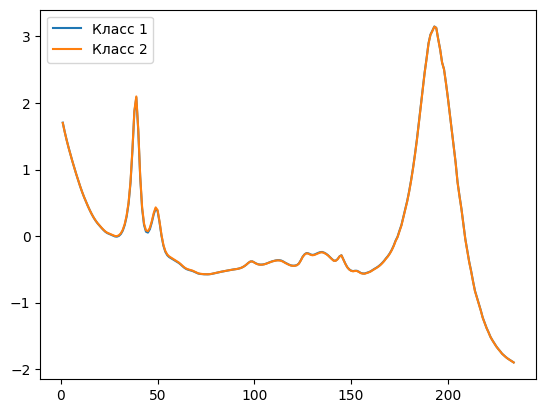

In [5]:
# EDA
print(df.shape)
print(df_train.shape, df_test.shape)

# Соотношение классов
print(labels.value_counts())

# Средние временные ряды по классам
for cls in labels.unique():
    mean_ts = time_series_values[labels == cls].mean(axis=0)
    plt.plot(mean_ts, label=f"Класс {cls}")
plt.legend()
plt.show()

In [6]:
# Подготовка данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ts_scaled = scaler.fit_transform(time_series_values)

X_train, y_train = df_train.iloc[:,1:], df_train.iloc[:,0]
X_test, y_test   = df_test.iloc[:,1:], df_test.iloc[:,0]

In [7]:
# Модель
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print(model.score(X_test, y_test)) # accuracy

0.7222222222222222


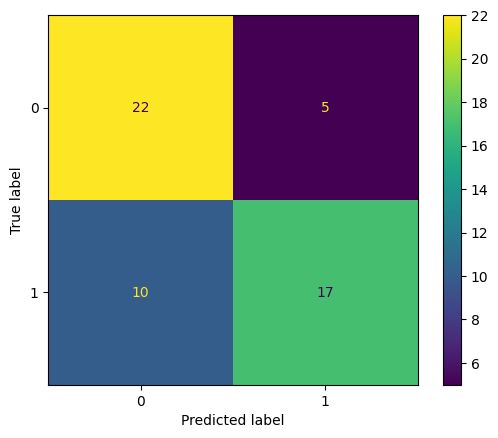

0.6636363636363636


In [8]:
# Оценка модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_m = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_m).plot()
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores.mean()) # Cross-val оценка